In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from gensim import corpora, models
import string
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


NameError: name 'file' is not defined

# Loading Data

In [ ]:
# Read the data from the text file
file_path = r"/content/nytimes_news_articles.csv"
df = pd.read_csv(file_path)

# Displaying the data

In [ ]:
print(df.head(10))
print(df['Paragraph'].head(10))

doc_data = df['Paragraph'].fillna('')

   Unnamed: 0                                          Paragraph
0           0  WASHINGTON — Stellar pitching kept the Mets af...
1           1  Mayor Bill de Blasio’s counsel and chief legal...
2           2  In the early morning hours of Labor Day last y...
3           3  It was the Apple Store in New York City before...
4           4  OMAHA — The United States Olympic swimming tri...
5           5  OMAHA — In the first three races of her third ...
6           6  Lionsgate is near a deal to buy Starz, uniting...
7           7  Under slate-colored light slanting from the sk...
8           8  WINTER GARDEN, Fla. — Jeff Hornacek, the new K...
9           9  As Washington Heights rejoiced on Wednesday ov...
0    WASHINGTON — Stellar pitching kept the Mets af...
1    Mayor Bill de Blasio’s counsel and chief legal...
2    In the early morning hours of Labor Day last y...
3    It was the Apple Store in New York City before...
4    OMAHA — The United States Olympic swimming tri...
5    OMAHA

# Preprocessing the data

In [ ]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Preprocess the text data
cleaned_text = doc_data.apply(preprocess_text)

In [ ]:
print(type(cleaned_text))

<class 'pandas.core.series.Series'>


In [ ]:
print(cleaned_text)

0       [washington, stellar, pitching, kept, mets, af...
1       [mayor, bill, de, blasio, counsel, chief, lega...
2       [early, morning, hour, labor, day, last, year,...
3       [apple, store, new, york, city, thing, apple, ...
4       [omaha, united, state, olympic, swimming, tria...
                              ...                        
8883    [second, critical, contest, america, 2016, ele...
8884    [april, 1, police, officer, 108th, precinct, c...
8885    [khilad, india, cattle, camp, dusty, back, roa...
8886    [director, abrams, dropped, possible, hint, fr...
8887    [palos, verdes, estate, high, atop, oceanside,...
Name: Paragraph, Length: 8888, dtype: object


In [ ]:
flattened_text = cleaned_text.tolist()
print(type(flattened_text))
first_five = flattened_text[:5]

for e in first_five:
  print(e)

<class 'list'>
['washington', 'stellar', 'pitching', 'kept', 'mets', 'afloat', 'first', 'half', 'last', 'season', 'despite', 'offensive', 'woe', 'produce', 'encore', 'season', 'lineup', 'keep', 'floundering', 'pitching', 'nicked', 'bruised', 'stretched', 'going', 'ride', 'pitching', 'manager', 'terry', 'collins', 'said', 'wednesday', 'game', 'riding', 'right', 'got', 'many', 'problem', 'pitching', 'wednesday', 'loss', 'washington', 'national', 'cruel', 'mets', 'pitching', 'steven', 'matz', 'place', 'spot', 'starter', 'logan', 'verrett', 'allowed', 'two', 'run', 'five', 'inning', 'even', 'large', 'deficit', 'mets', 'lineup', 'overcome', 'max', 'scherzer', 'national', 'even', 'giving', 'chance', 'collins', 'said', 'adding', 'later', 'give', 'pitcher', 'room', 'mets', 'score', 'ninth', 'inning', 'homer', 'james', 'loney', 'national', 'reliever', 'shawn', 'kelley', 'snapped', 'streak', '23', 'scoreless', 'inning', 'mets', 'swept', 'series', 'fell', 'six', 'game', 'behind', 'national', 'nat

# Creating Model

In [ ]:
# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(flattened_text)
doc_term_matrix = [dictionary.doc2bow(text) for text in cleaned_text]

Finding Number of Topics Based On Coherence Score

In [ ]:
from gensim.models import CoherenceModel

# Define a range of candidate numbers of topics
num_topics_range = range(5, 21)  # Adjust the range based on your requirements

# Initialize lists to store coherence scores
coherence_scores = []

# Iterate over the range of candidate numbers of topics
for num_topics in num_topics_range:
    # Train the LSA model
    lsi_model = models.LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)

    # Compute coherence score
    coherence_model = CoherenceModel(model=lsi_model, texts=cleaned_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Store the coherence score
    coherence_scores.append(coherence_score)

# Find the optimal number of topics with the highest coherence score
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]

# Print the coherence scores for each number of topics
for num_topics, coherence_score in zip(num_topics_range, coherence_scores):
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score}")

# Print the optimal number of topics
print(f"\nOptimal Number of Topics: {optimal_num_topics}")

Number of Topics: 5, Coherence Score: 0.44213792962897625
Number of Topics: 6, Coherence Score: 0.4917153748698762
Number of Topics: 7, Coherence Score: 0.4654913283082352
Number of Topics: 8, Coherence Score: 0.500016374086357
Number of Topics: 9, Coherence Score: 0.42294240918389364
Number of Topics: 10, Coherence Score: 0.4617899600677278
Number of Topics: 11, Coherence Score: 0.36717386349995773
Number of Topics: 12, Coherence Score: 0.3783405411744385
Number of Topics: 13, Coherence Score: 0.41358792248744264
Number of Topics: 14, Coherence Score: 0.42139284088255374
Number of Topics: 15, Coherence Score: 0.41703606287111633
Number of Topics: 16, Coherence Score: 0.36145277491851757
Number of Topics: 17, Coherence Score: 0.3902193050115586
Number of Topics: 18, Coherence Score: 0.3653111029150488
Number of Topics: 19, Coherence Score: 0.34210267591136634
Number of Topics: 20, Coherence Score: 0.3850778246224492

Optimal Number of Topics: 8


Creating Model with Optimum Topic Number

In [ ]:
# Apply Latent Semantic Analysis (LSA)
lsi_model = models.LsiModel(doc_term_matrix, id2word=dictionary, num_topics=optimal_num_topics)  # You can adjust the number of topics as needed
lsi_topics = lsi_model.print_topics()
for topic in lsi_topics:
    print(topic)

NameError: name 'optimal_num_topics' is not defined

In [ ]:
def apply_lsa(data):
    dictionary = corpora.Dictionary(data)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in data]
    lsi_model = models.LsiModel(doc_term_matrix, id2word=dictionary, num_topics=5)
    return lsi_model

# Graphing Results

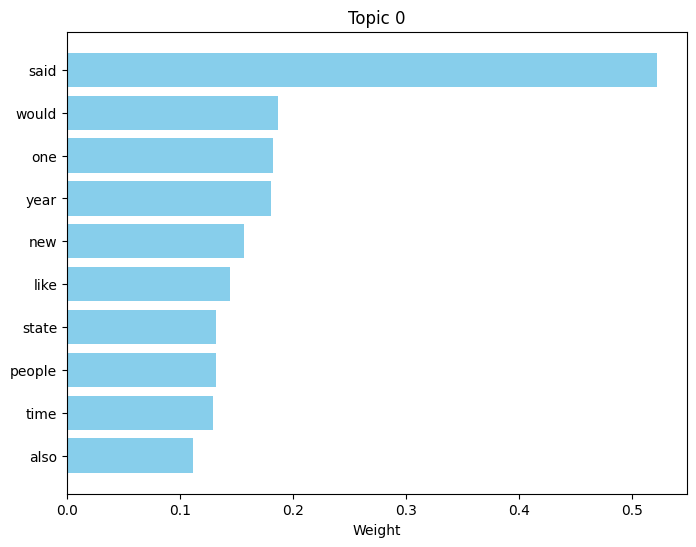

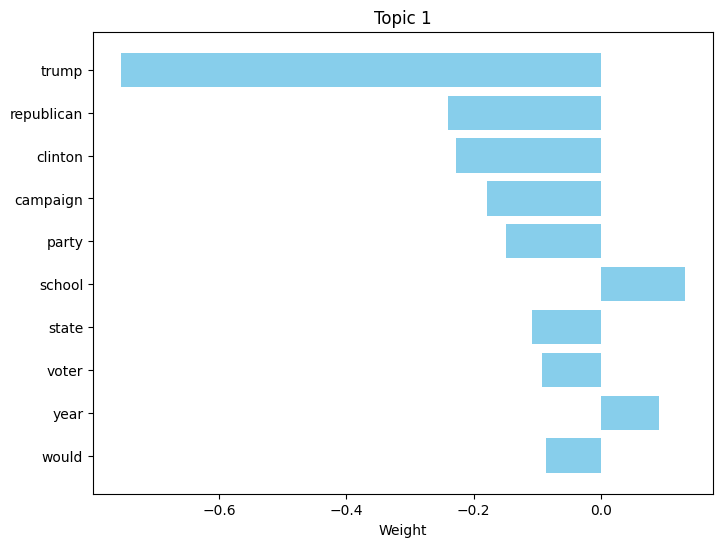

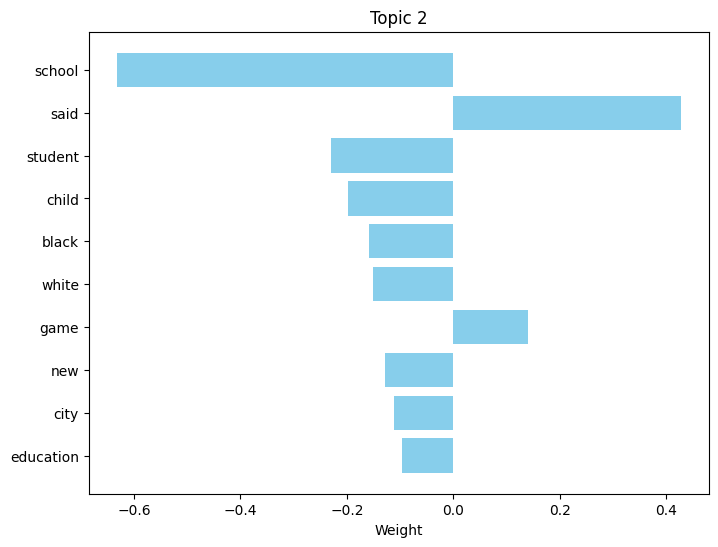

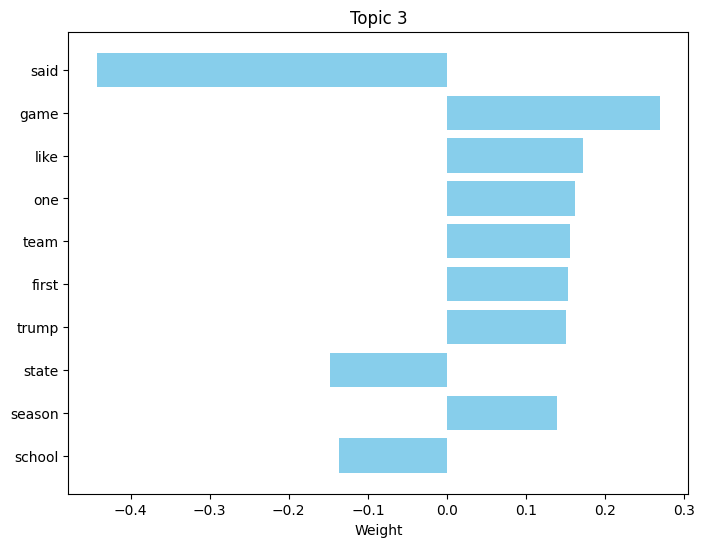

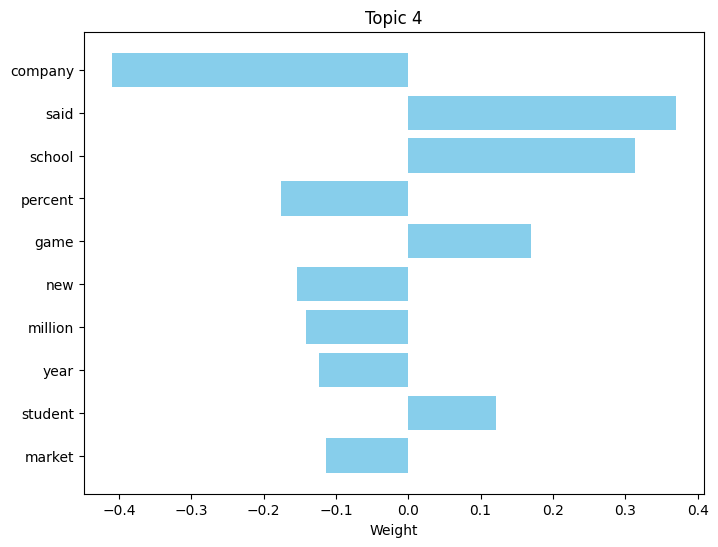

In [ ]:
import matplotlib.pyplot as plt

def visualize_topics(lsi_model):
    topics = lsi_model.show_topics(formatted=False)
1
    for topic_idx, topic in topics:
        words = [word for word, _ in topic]
        weights = [weight for _, weight in topic]

        plt.figure(figsize=(8, 6))
        plt.barh(words, weights, color='skyblue')
        plt.xlabel('Weight')
        plt.title(f'Topic {topic_idx}')
        plt.gca().invert_yaxis()
        plt.show()

# Visualize topics
visualize_topics(lsi_model)
